# Lab 5 Exercise: Fourier Analysis

In the last lab you got your first glimpse of a Fourier transform. In this lab you will learn more about analyzing light curves using Fourier transforms. Using Python, you will see the effect that noise and gaps in the data have on the Fourier transform of a signal. You will then use the program _Period04_ for a systematic investigation of the frequencies (and periods) that are present in a data set on a pulsating star.

Initialize/evaluate/run the following cell to set up the _ipython_ notebook.

In [1]:
# Enable inline matplotlib plots
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 18})

## Fourier Transform

The following cell contains code for a discrete Fourier transform. Evaluate it so that we may call this function later.

In [2]:
def FT(freqmin,freqmax,nsteps,t,x):
    freqvec = np.linspace(freqmin,freqmax,nsteps)
    ampvec = []
    n=float(len(t))
    for freq in freqvec:
        omega = 2.*np.pi*freq
        wts = np.sin(omega*t)
        wtc = np.cos(omega*t)
        camp = np.dot(wtc,x)
        samp = np.dot(wts,x)
        amp = np.sqrt(camp**2 + samp**2)
        ampvec.append(amp)
    
    ampvec = (2./n)*np.array(ampvec)
    imax = np.argmax(ampvec)
    freqmax = freqvec[imax]
    print('The maximum amplitude {0} occurs at a frequency \nof {1} hz and a period of {2} sec'.format(ampvec[imax],freqmax,1./freqmax))
    return freqvec,ampvec,freqmax

## Create a Signal
Now let's create a sinusoidal signal with a given amplitude and frequency. We'll also plot it to see what it looks like.

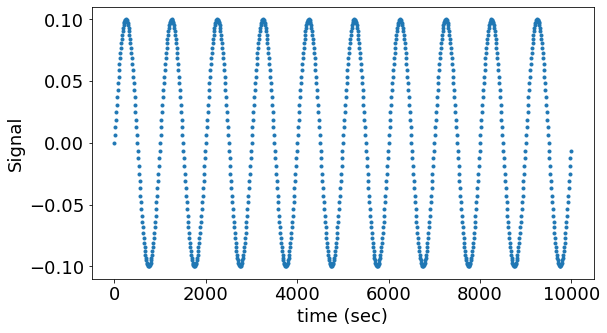

In [3]:
Amp = 0.1;          # amplitude
period = 1000.      # period (sec)

freq = 1./period    # frequency
omega = 2*np.pi*freq
tbegin = 0.0        # beginning time
tend = 10000.0      # ending time

dt = 10.            # time between data points (sec)

time = np.arange(tbegin,tend,dt)  # generate a sequence of times

signal = Amp*np.sin(omega*time)   # This is the signal

plt.figure(figsize=(9,5))
plt.plot(time,signal,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

Now we will take a Fourier Transform ("FT") of the data. This will tell us the frequency and amplitude of the periodicities in our signal:

The maximum amplitude 0.1 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec


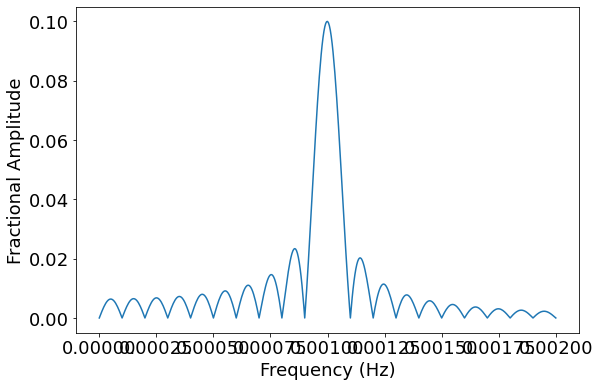

In [5]:
freqs,amps,fmax = FT(0.000,0.002,501,time,signal)
plt.figure(figsize=(9,6))
plt.plot(freqs,amps)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

Now let's add a second periodicity to our data and see what the resulting FT looks like:

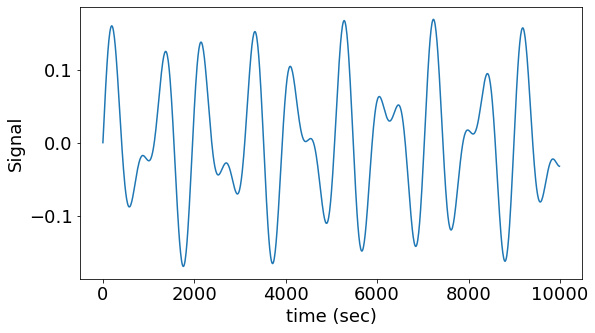

In [6]:
Amp1 = 0.1;          # amplitude
period1 = 1000.      # period (sec)
freq1 = 1./period1    # frequency
omega1 = 2*np.pi*freq1

Amp2 = 0.07;         # amplitude
period2 = 642.       # period (sec)
freq2 = 1./period2   # frequency
omega2 = 2*np.pi*freq2

tbegin = 0.0        # beginning time
tend = 10000.0      # ending time

dt = 10.            # time between data points (sec)

time = np.arange(tbegin,tend,dt)  # generate a sequence of times

signal = Amp1*np.sin(omega1*time) + Amp2*np.sin(omega2*time)  # This is the signal

plt.figure(figsize=(9,5))
plt.plot(time,signal)
plt.xlabel('time (sec)')
plt.ylabel('Signal');

So let's see what what the Fourier Transform of a signal with two periodicities looks like:

The maximum amplitude 0.09938640060354571 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec


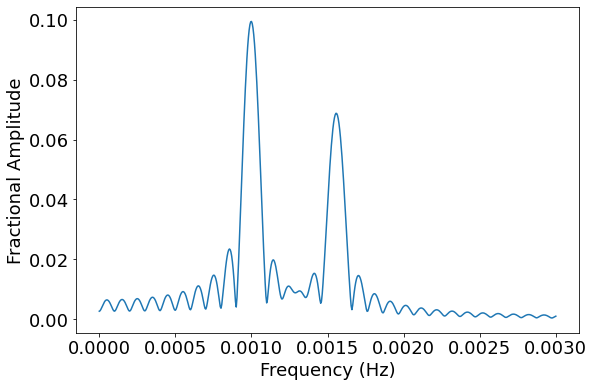

In [7]:
freqs,amps,fmax = FT(0.000,0.003,601,time,signal)
plt.figure(figsize=(9,6))
plt.plot(freqs,amps)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

## Sampling and Aliasing

Unfortunately, we often have observations with gaps in them. For instance, if we observe 8 hours per night for 4 nights, we have 8-hour sequences of data separated by 16-hour gaps. The code below calculates such a light curve for two nights of data:

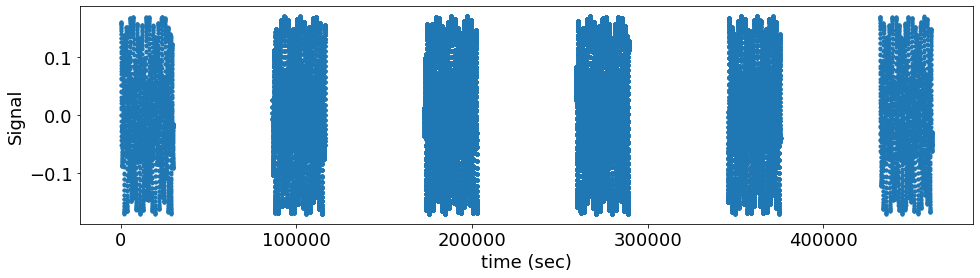

In [22]:
Amp1 = 0.1;          # amplitude
period1 = 1000.      # period (sec)
freq1 = 1./period1    # frequency
omega1 = 2*np.pi*freq1

Amp2 = 0.07;         # amplitude
period2 = 642.       # period (sec)
freq2 = 1./period2   # frequency
omega2 = 2*np.pi*freq2

tbegin = 0.0        # beginning time
tend = 30000.0      # ending time

dt = 10.            # time between data points (sec)
ndays = 6           # number of days of data

time0 = np.arange(tbegin,tend,dt)  # generate a sequence of times
time = time0

for i in np.arange(ndays-1):
    time = np.append(time,time + 86400.)

signal = Amp1*np.sin(omega1*time) + Amp2*np.sin(omega2*time)

plt.figure(figsize=(16,4))
plt.plot(time,signal,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

The maximum amplitude 0.09575735442462456 occurs at a frequency 
of 0.0009989999999999999 hz and a period of 1001.0010010010011 sec


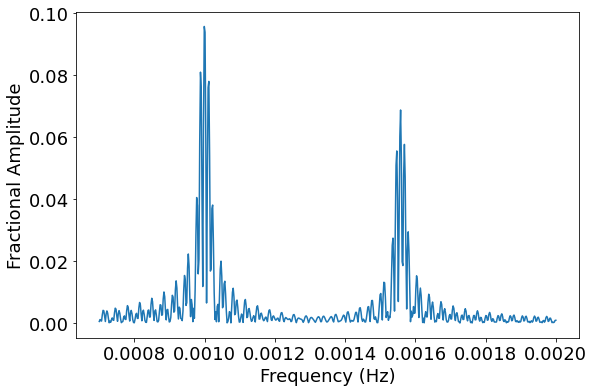

In [9]:
freqs,amps,fmax = FT(0.0007,0.002,601,time,signal)
plt.figure(figsize=(9,6))
plt.plot(freqs,amps)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

If we zoom in on one of these peaks, we see a sequence of peaks around the "real peak" (we zoom by adjusting the frequency range that we call the FT function with). We call this effect "aliasing" and the "fake" peaks aliases.

The maximum amplitude 0.09931174161692446 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec
The maximum amplitude 0.09931174161692446 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec


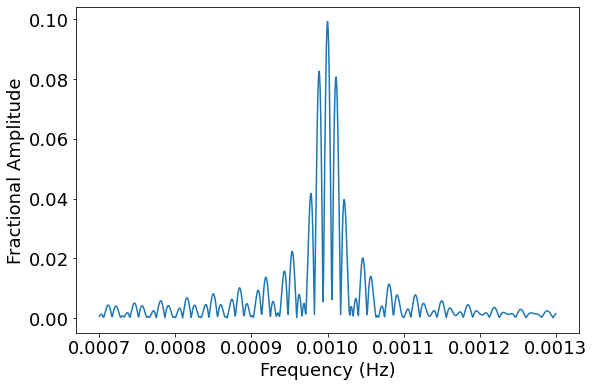

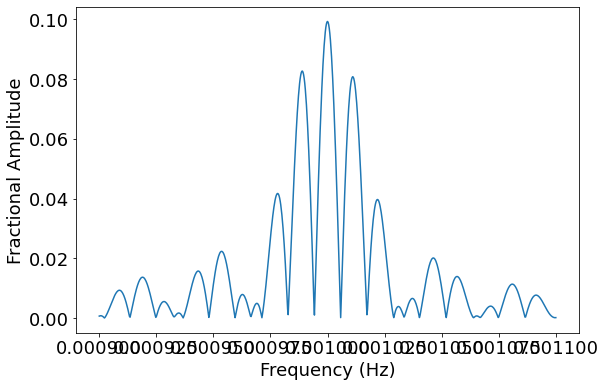

In [10]:
freqs,amps,fmax = FT(0.0007,0.0013,801,time,signal)
plt.figure(figsize=(9,6))
plt.plot(freqs,amps)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude')

freqs,amps,fmax = FT(0.0009,0.0011,801,time,signal)
plt.figure(figsize=(9,6))
plt.plot(freqs,amps)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

The highest peak in the above plot corresponds to an actual signal (periodicity) in the data, but the peaks around it (the "sidelobes" or "alias" peaks) do not. They arise from the fact that there is a "one-day gap" in the data. 

# The Effect of Noise

So far, so good. Now we're going to add noise to the data and see how it affects things. First let's see how it affects the signal...

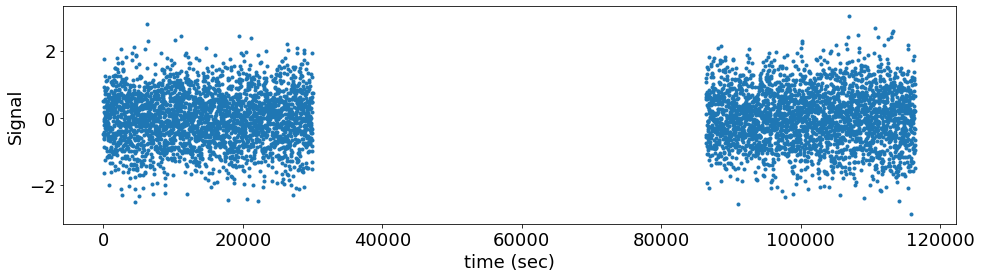

In [11]:
noise_amp = 0.8  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(16,4))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

The resulting Fourier Transform now looks like this:

The maximum amplitude 0.11013713165421204 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec


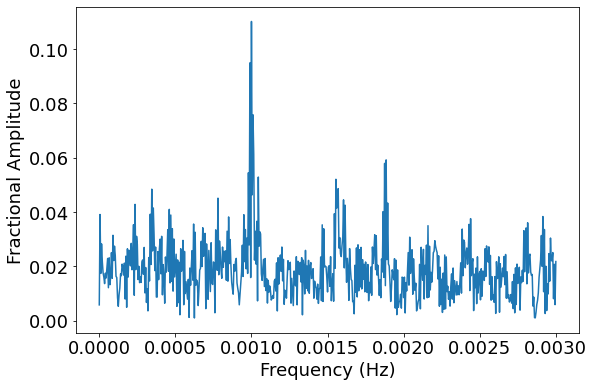

In [12]:
freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(9,6))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

Zoom in on one of the two main peaks by adjusting the maximum and minimum of the Fourier transform and read off the height of the main peak and its frequency. The more you zoom in the more accurate your answer will be. For example ...

The maximum amplitude 0.11221997455121963 occurs at a frequency 
of 0.0010007 hz and a period of 999.30048965724 sec


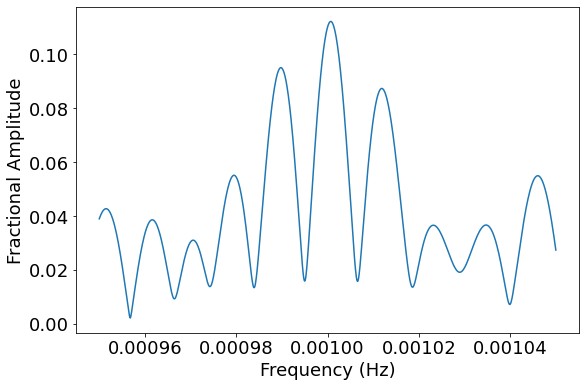

In [13]:
freqs,amps_noise,fmax = FT(0.00095,0.00105,1001,time,signal_noise)
plt.figure(figsize=(9,6))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

# Repeat the above analyses

For this part, you are actually going to create new cells in this notebook and evaluate them. **Note:** you are allowed to copy and paste the contents from the relevant cells above, check the parameters when necessary, and re-run them.

Repeat the above noise analysis above with different sizes of noise: use noise_amp = 0.1, 0.5, 1.0, and 2.0 for the amplitude of the noise; for each value of the noise repeat the analysis three separate times each (since the noise is random it will be different each time) and record your estimates of the frequency and height of the main peak each time. Compute and record the Average and Standard Deviation of these three values. At what point does the noise swamp the signal in the FT, i.e., at what point is it hard to tell the actual peaks from those generated by random noise?

You can insert the new cells directly below this cell (you may want to use _Insert_ --> _Insert Cell Below_ from the notebook window):

The maximum amplitude 0.10139003700826127 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec
The maximum amplitude 0.09844241909252309 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec
The maximum amplitude 0.09847052990993387 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec


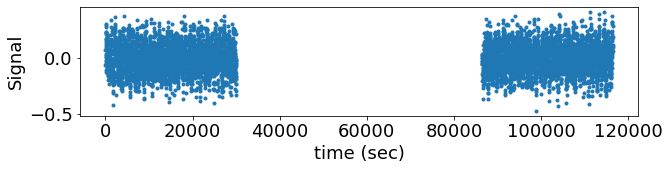

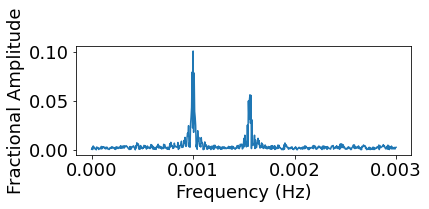

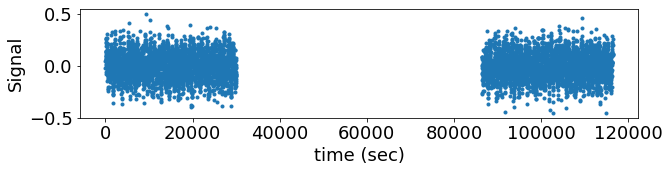

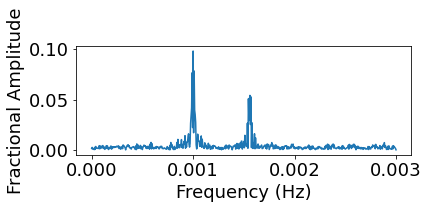

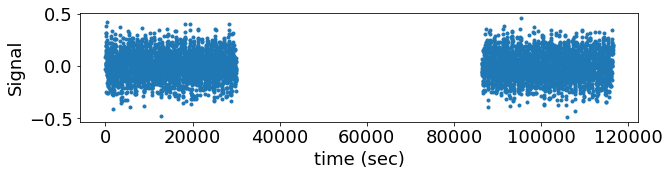

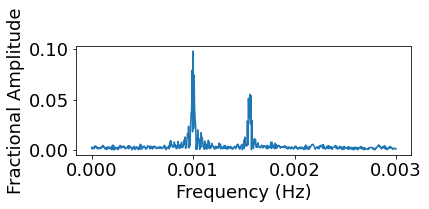

In [14]:
#Trial 1
noise_amp = 0.1  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

#Trial 2
noise_amp = 0.1  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

#Trial 3
noise_amp = 0.1  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

In [15]:
#stdev & mean

max_amp = [0.0995,0.0974,0.0996]
freq_set = [0.001, 0.001 , 0.001]
print("Amplitude & Frequency w/ Noise Amp. of 0.1")
print("Average Amplitude: {}, StDev: {}".format(np.mean(max_amp), np.std(max_amp)))
print("Average Frequency: {}, StDev: {}".format(np.mean(freq_set), np.std(freq_set)))

Amplitude & Frequency w/ Noise Amp. of 0.1
Average Amplitude: 0.09883333333333333, StDev: 0.0010143416036468619
Average Frequency: 0.001, StDev: 0.0


The maximum amplitude 0.09276888538391806 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec
The maximum amplitude 0.10369683034328388 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec
The maximum amplitude 0.09567130580565589 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec


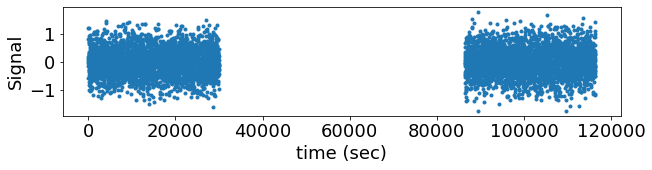

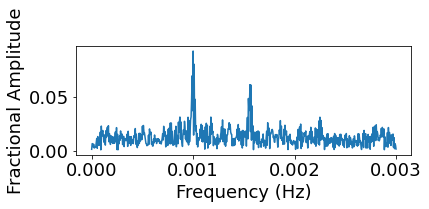

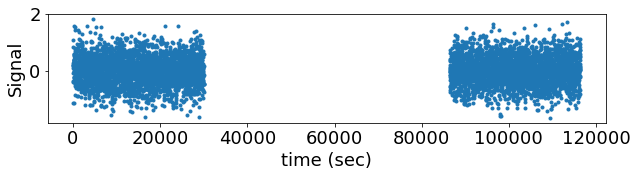

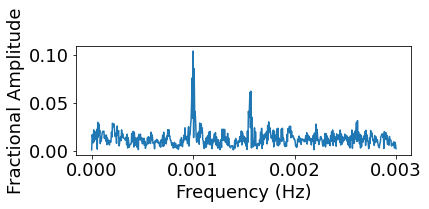

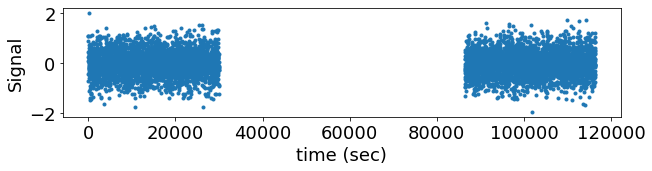

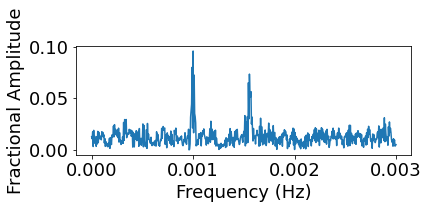

In [16]:
#Trial 1
noise_amp = 0.5  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

#Trial 2
noise_amp = 0.5  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

#Trial 3
noise_amp = 0.5  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.0000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

In [17]:
#stdev & mean

max_amp = [0.0866,0.0995,0.113]
freq_set = [0.0009, 0.001 , 0.0009]
print("Amplitude & Frequency w/ Noise Amp. of 0.5")
print("Average Amplitude: {}, StDev: {}".format(np.mean(max_amp), np.std(max_amp)))
print("Average Frequency: {}, StDev: {}".format(np.mean(freq_set), np.std(freq_set)))

Amplitude & Frequency w/ Noise Amp. of 0.5
Average Amplitude: 0.0997, StDev: 0.010778682665335318
Average Frequency: 0.0009333333333333333, StDev: 4.714045207910318e-05


The maximum amplitude 0.09880225398250322 occurs at a frequency 
of 0.0009886666666666668 hz and a period of 1011.4632501685771 sec
The maximum amplitude 0.09229196086598737 occurs at a frequency 
of 0.0010006666666666666 hz and a period of 999.3337774816789 sec
The maximum amplitude 0.13447058688643607 occurs at a frequency 
of 0.001 hz and a period of 1000.0 sec


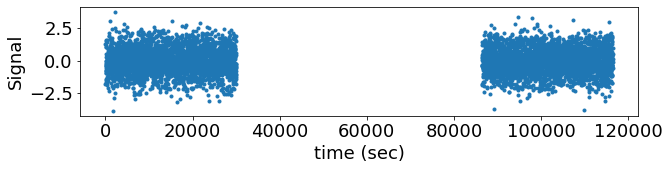

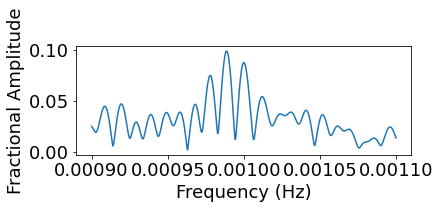

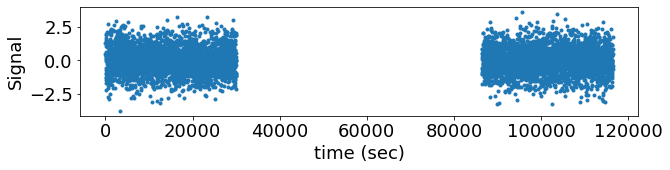

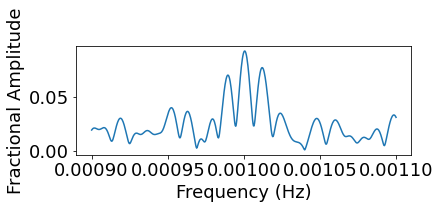

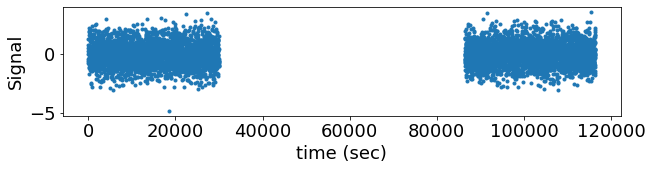

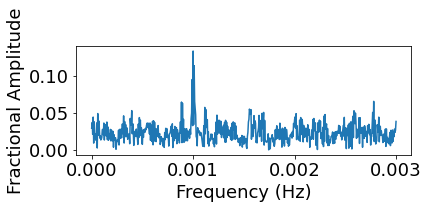

In [18]:
#Trial 1
noise_amp = 1.0  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.0009,0.0011,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

#Trial 2
noise_amp = 1.0  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.0009,0.0011,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

#Trial 3
noise_amp = 1.0  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

In [19]:
#stdev & mean

max_amp = [0.0846,0.0705,0.125]
freq_set = [0.0009, 0.001 , 0.001]
print("Amplitude & Frequency w/ Noise Amp. of 1.0")
print("Average Amplitude: {}, StDev: {}".format(np.mean(max_amp), np.std(max_amp)))
print("Average Frequency: {}, StDev: {}".format(np.mean(freq_set), np.std(freq_set)))

Amplitude & Frequency w/ Noise Amp. of 1.0
Average Amplitude: 0.09336666666666667, StDev: 0.02309694544499097
Average Frequency: 0.0009666666666666666, StDev: 4.714045207910319e-05


The maximum amplitude 0.14417320248190724 occurs at a frequency 
of 0.0015600000000000002 hz and a period of 641.025641025641 sec
The maximum amplitude 0.12459606191699471 occurs at a frequency 
of 0.0010450000000000001 hz and a period of 956.9377990430621 sec
The maximum amplitude 0.13228497721308352 occurs at a frequency 
of 0.0013000000000000002 hz and a period of 769.2307692307692 sec


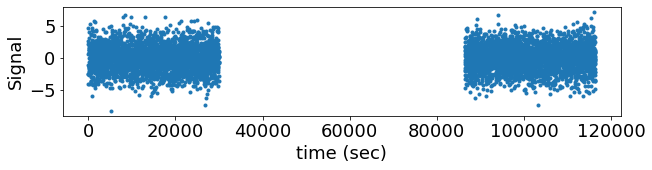

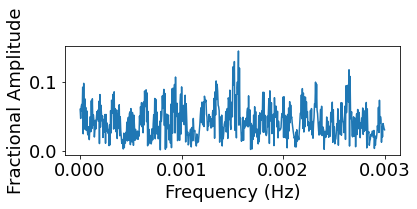

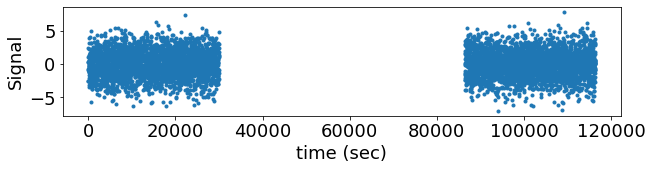

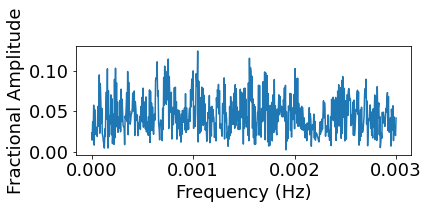

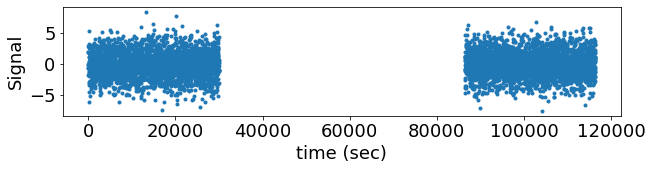

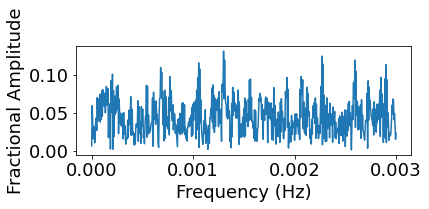

In [20]:
#Trial 1
noise_amp = 2.0  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

#Trial 2
noise_amp = 2.0  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.0000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

#Trial 3
noise_amp = 2.0  # This is the amplitude of the noise
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.000,0.003,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');

In [21]:
#stdev & mean

max_amp = [0.162,0.117,0.168]
freq_set = [0.0009, 0.001 , 0.001]
print("Amplitude & Frequency w/ Noise Amp. of 2.0")
print("Average Amplitude: {}, StDev: {}".format(np.mean(max_amp), np.std(max_amp)))
print("Average Frequency: {}, StDev: {}".format(np.mean(freq_set), np.std(freq_set)))

Amplitude & Frequency w/ Noise Amp. of 2.0
Average Amplitude: 0.14900000000000002, StDev: 0.022759613353482085
Average Frequency: 0.0009666666666666666, StDev: 4.714045207910319e-05


In [ ]:
#Q:Does the standard deviation go up or down as the noise level increases?
#A: As the magnitude of the noise level increased it appears that the standard deviation of the amplitudes of our
#peaks increased as well

# Time baseline of observations

Now set the noise level to the critical value of the noise you found above at which you can no longer rely on the FT.  Increase the length of the simulated observations by a factor of 3 (hint: change the number of days of the observations) and repeat the FT calculation on the resulting data set. Does having more data affect the resulting FT for this case?

Put your new cells below:

The maximum amplitude 0.11234047183424412 occurs at a frequency 
of 0.0010001666666666666 hz and a period of 999.8333611064824 sec


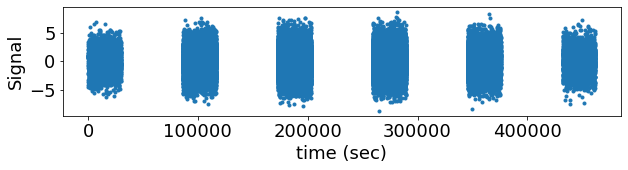

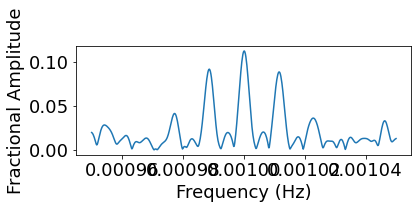

In [27]:
noise_amp = 2.0
noise = noise_amp * np.random.randn(len(time))
signal_noise = signal + noise

plt.figure(figsize=(10,2))
plt.plot(time,signal_noise,'.')
plt.xlabel('time (sec)')
plt.ylabel('Signal');

freqs,amps_noise,fmax = FT(0.00095,0.00105,601,time,signal_noise)
plt.figure(figsize=(6,2))
plt.plot(freqs,amps_noise)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fractional Amplitude');



In [28]:
#Q:What does increasing the time base of the observations/simulations do?
#A: The peak of the FT seems considerably more discernable when the size of the dataset is increased (increasing the 
#timebase of the observations)